In [1]:
# Takes a while to load all when you started 
from __future__ import print_function, unicode_literals, absolute_import, division
# Here import important system functions 
import os
import sys
# import tk for getting the directory faster. dont need this in a command line/server version
from tkinter import *
from tkinter import filedialog
# you need numpy as always
import numpy as np
import csv
# if you dont need to plot in jupyter you don need these. Some magic interperters need to be removed for command line version. 
import matplotlib
matplotlib.rcParams["image.interpolation"] = 'none'
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Glob and tifffile are needed
from glob import glob
from tifffile import imread,imwrite
# csb deep is to take normalization 
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible
# This is your stardist models and everything in stardist coming from. 
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D
# Set random seed for you color map. You do not really need this to be 6 all the time, but its okay. 
np.random.seed(6)
lbl_cmap = random_label_cmap()

In [2]:
#this is for getting the directory, and helps saving time of typing what ever directory it is. 
root = Tk()
pathname = filedialog.askdirectory()
# Close Tk window
root.destroy
root.quit()
# Change directory
os.chdir(pathname)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [5]:
# always check where you are at
print("the current directory is",os.getcwd())

the current directory is /Users/eliasguan/Desktop/EG_Nucleus_Segementation_test/022523_smFISH_analysis_v2.0_development/Weekly_Reports/2024Spring/032424/DataSets/Test1


In [3]:
def create_results_directory():
    current_directory = os.getcwd()  # Get the current working directory
    results_directory = os.path.join(current_directory, 'results')  # Path to the results directory
    
    if not os.path.exists(results_directory):  # Check if the results directory exists
        os.mkdir("results")  # Create the results directory if it doesn't exist
        print("Results directory created successfully.")
    else:
        print("Results directory already exists.")

# Call the function to create the directory
create_results_directory()

Results directory created successfully.


In [9]:
# First lets try for 1 image. This test 1 file have 1 image here. 
# Get your image file. I agree with that the glob function should be sorted especially when you have a lot of file. 
# Even if we only have 1 here, but this will make it easier later on. 
X = sorted(glob('*.tif'))
# This is a great way to read all images. map(imread, X) equals to for item in X: imread(item), and list makes a list for all of them. 
dataset = list(map(imread,X))
# Try dataset[0] and np.shape(dataset[0])
np.shape(dataset[0])

(2524, 1672)

In [10]:
# Nomralize your image
# Here you mihgt want to manual threshold once of you image. 
img = normalize(dataset[0], 0.1,99.8, axis=(0,1))

In [11]:
# load your model
# By napari-stardist test this is the best model they have. Run StarDist2D.from_pretrained() to get all model names and alias.
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [12]:
# Make your predictions
# I think these nms threshold only come from the model rather than change based on images. Please read the stardist-napari read me and I found this
# The selected model may have an associated threshold value, which can be loaded via the *Set optimized postprocessing thresholds (for selected model)* button.
labels, details = model.predict_instances(img)

2024-03-24 20:39:14.775876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


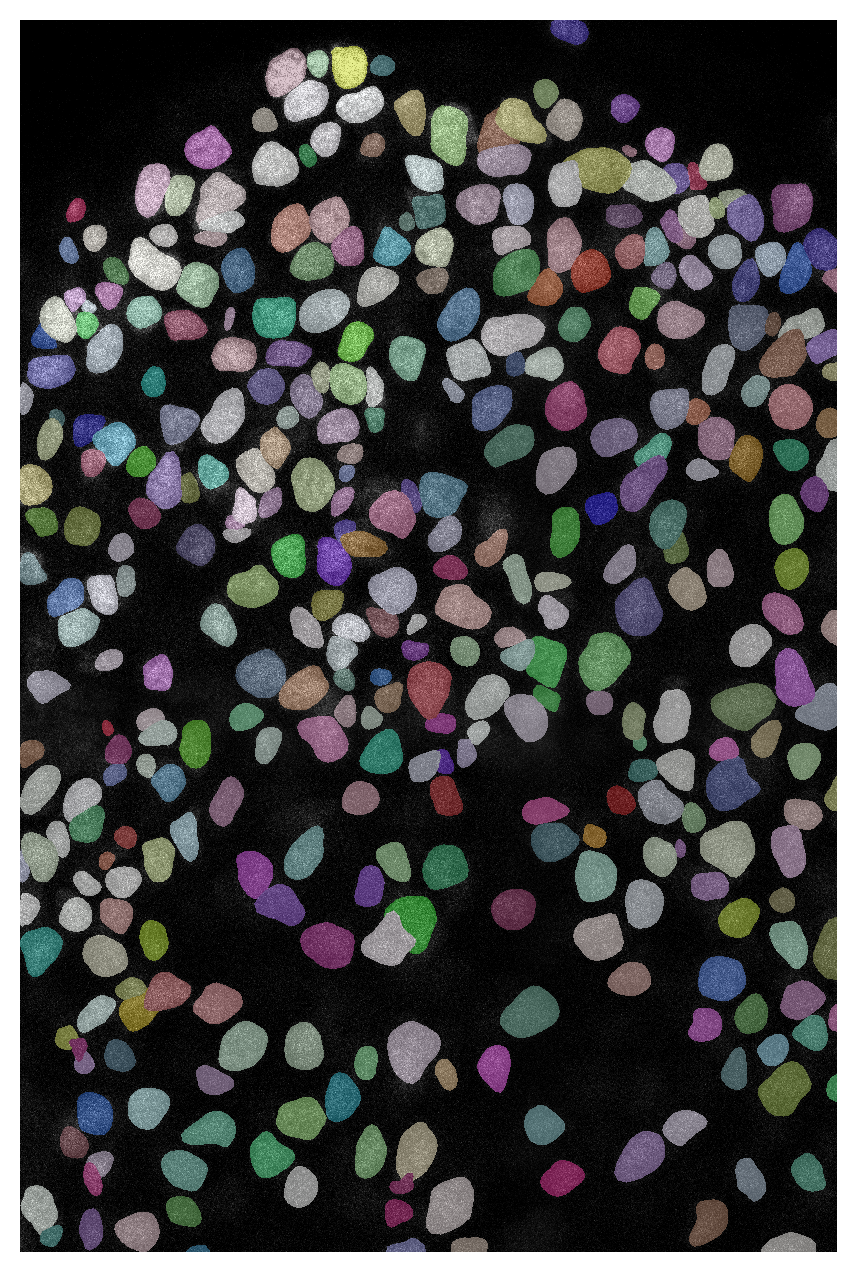

In [13]:
# Plot the output image. You can basically save this for you own notice and other things. 
plt.figure(figsize=(8,8))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

In [4]:
# Since this is working, lets enter multi-zstack working mode. 
root = Tk()
pathname = filedialog.askdirectory()
# Close Tk window
root.destroy()
# Change directory
os.chdir(pathname) 
# Here start get your poly-stack z-stack
print("the current directory is",os.getcwd())

the current directory is /Users/eliasguan/Desktop/EG_Nucleus_Segementation_test/022523_smFISH_analysis_v2.0_development/Weekly_Reports/2024Spring/032424/DataSets/Multiple_zstack_test/max_projections/15_stack_projection


In [5]:
# Make the directory for labels and etc.
def create_directory(dir_name):
    '''input: Dir_name: The name of the directory, string, default results 
       output: Wether the directory is created or it already exists 
    '''
    current_directory = os.getcwd()  # Get the current working directory
    results_directory = os.path.join(current_directory, str(dir_name))  # Path to the results directory
    
    if not os.path.exists(results_directory):  # Check if the results directory exists
        os.mkdir(dir_name)  # Create the results directory if it doesn't exist
        print("Results directory created successfully.")
    else:
        print("Results directory already exists.")

# Call the function to create the directory
create_directory('labels')
create_directory('images')
create_directory('polygons')
create_directory('Random_examples')

Results directory already exists.
Results directory already exists.
Results directory already exists.
Results directory already exists.


In [6]:
X = sorted(glob('*.tif'))
# This is a great way to read all images. map(imread, X) equals to for item in X: imread(item), and list makes a list for all of them. 
dataset = list(map(imread,X))
# Try dataset[0] and np.shape(dataset[0])
np.shape(dataset[0])

(2524, 1672)

In [7]:
# Load the model. 
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.


2024-04-16 17:45:01.727645: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-04-16 17:45:01.727672: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-16 17:45:01.727676: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-16 17:45:01.727829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-16 17:45:01.727842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [8]:
# Set parameter: 
def make_stardist_Predictions (dataset, normalize_low = 0, normalize_high = 0, nms_thresh = 0, prob_thresh = 0): 
    for i in range(len(dataset)): 
        if normalize_low ==0 or normalize_high == 0:
            img = normalize(dataset[i], 1,99.8, axis=(0,1))
        else:
            img = normalize(dataset[i], normalize_low, normalize_high, axis=(0,1))
        if nms_thresh == 0 or prob_thresh == 0 :
            labels, polygons = model.predict_instances(img)
            labels, details = model.predict_instances(img)
        else: 
            labels, polygons = model.predict_instances(img,nms_thresh = nms_thresh, prob_thresh = prob_thresh)
            labels, details = model.predict_instances(img,nms_thresh = nms_thresh, prob_thresh = prob_thresh)
        # write labels
        imwrite("labels/Nucleus_Labels_"+str(i).zfill(3)+".tif", labels)
        # Create figure for images + labels
        labelfigure = plt.figure(figsize=(8,8))
        plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
        plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
        plt.axis('off');
        plt.savefig('images/segmented_image_'+str(i).zfill(3)+'.png')
        plt.close(labelfigure)
        # Export polygons
        export_imagej_rois('polygons/polygon_rois_'+str(i).zfill(3)+'.zip', polygons['coord'])
      


In [9]:
# I think I need to remake some of these functions here to make it work better. 
# Make a code to random select images 
import random
import math

def random_select_images(image_list, percentage):
    """
    Randomly selects X% of images from the given list.
    
    Parameters:
        image_list (list): List of images.
        percentage (float): Percentage of images to select.
        
    Returns:
        list: List of randomly selected images.
    """
    # Calculate the number of images to select
    num_images_to_select = math.ceil(len(image_list) * percentage / 100)
    
    # Randomly select images
    selected_images = random.sample(image_list, num_images_to_select)
    
    return selected_images

In [10]:
np.random.seed(114514)
selected_images = random_select_images(dataset, 20)
# Always check if you are correct. Here the selected z stack =50, 20% will be 10, and shape of each image should be the same as original images. 
print(len(selected_images))
print(selected_images[0].shape)

1
(2524, 1672)


In [11]:
# Randomly crop an area of each image
def random_crop_images(dataset, X, Y):
    """
    Randomly crops images from the dataset to the specified size (X, Y).
    
    Parameters:
        dataset (list of 2D arrays): List of images.
        X (int): Width of the cropped area.
        Y (int): Height of the cropped area.
        
    Returns:
        list: List of cropped images.
    """
    cropped_dataset = []
    
    for image in dataset:
        height, width = image.shape
        
        # Check if X or Y exceeds the dimensions of the image
        if X > width or Y > height:
            raise ValueError("X or Y exceeds the dimensions of the image")
        
        # Generate random coordinates for the top-left corner of the cropped area
        top_left_x = random.randint(0, width - X)
        top_left_y = random.randint(0, height - Y)
        
        # Crop the image
        cropped_image = image[top_left_y:top_left_y + Y, top_left_x:top_left_x + X]
        
        cropped_dataset.append(cropped_image)
    
    return cropped_dataset

In [12]:
cropped_selected_images = random_crop_images(selected_images,500,500)
print(len(cropped_selected_images))
print(cropped_selected_images[0].shape)

1
(500, 500)


In [13]:
# Create a example for the model. Trying to save the amount of object in the Image as well. 
def example(model, image, show_dist=True):
    # Normalized image
    img = normalize(image, 1,99.8, axis = (0,1))
    # Get labels and details 
    labels, details = model.predict_instances(img)
    # Plt figure
    figure = plt.figure(figsize=(13,10))
    # Make image to show
    img_show = img if img.ndim==2 else img[...,0]
    # Get coordinates 
    coord, points, prob = details['coord'], details['points'], details['prob']
    # Plot image on the first one
    ax1 = figure.add_subplot(131); ax1.imshow(img_show, cmap='gray'); ax1.axis('off')
    # Plot image on the second one
    ax2 = figure.add_subplot(132); ax2.imshow(img_show, cmap='gray'); ax2.axis('off')
    # plot the ploygons using the function from stardist
    a = ax2.axis()
    _draw_polygons(coord, points, prob, show_dist=show_dist)
    ax2.axis(a)
    # Plot the image on the third one
    ax3 = figure.add_subplot(133); ax3.imshow(img_show, cmap='gray'); ax3.axis('off')
    # Plot labels on the third one. 
    ax3.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    figure.tight_layout()
    return figure

2024-04-16 17:45:31.955214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


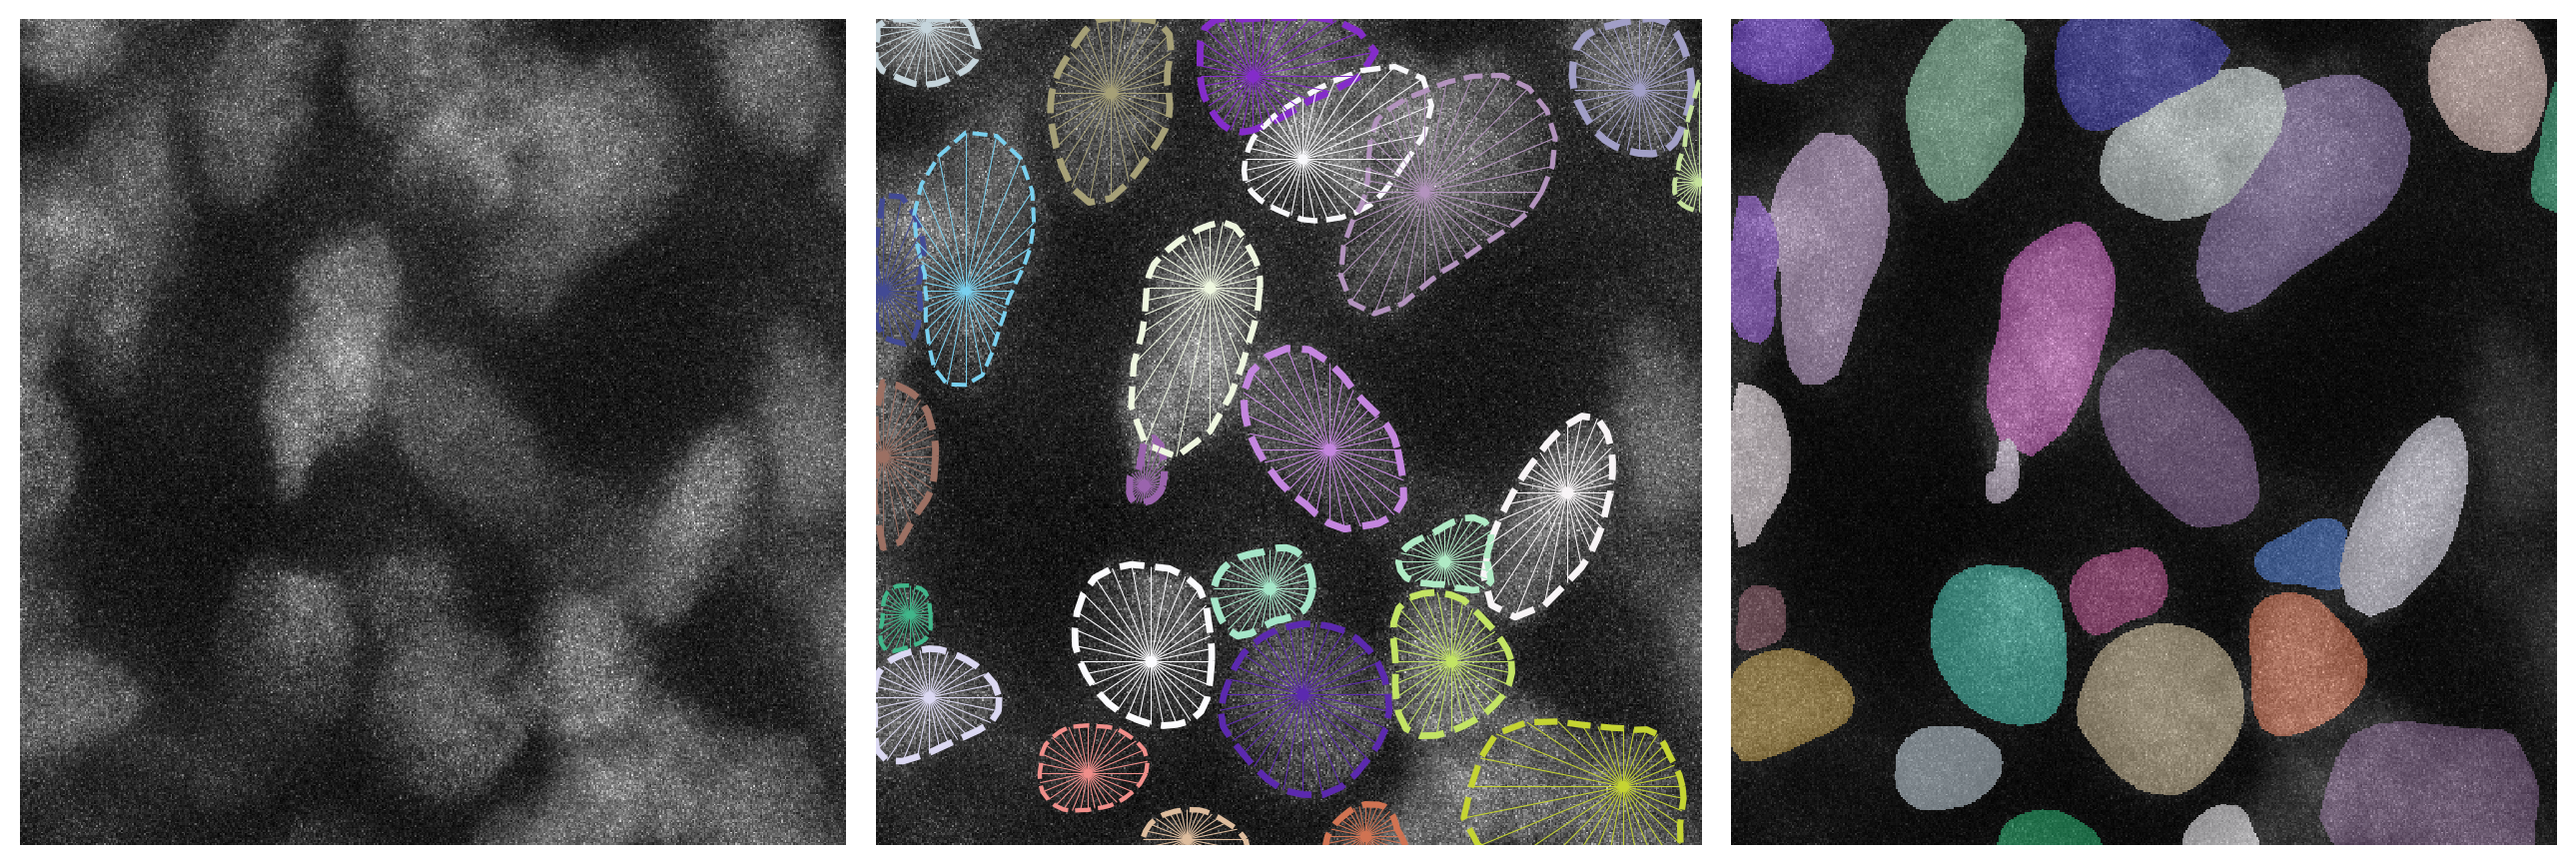

In [14]:
figure = example(model, cropped_selected_images[0])

In [15]:
def get_label_numbers(model, image):
    ''' input: Model for which model you are using. 
        output: image for which image you are using. 
    '''
    img = normalize(image, 1, 99.8, axis =(0,1))
    labels, details = model.predict_instances(img)
    unique_labels = np.unique(labels)
    num_labels = len(unique_labels) - 1 # -1 for the background, label 0 is usually the background image. 
    return num_labels

In [15]:
# I manually counted it is correct
get_label_numbers(model, cropped_selected_images[0])

2024-04-03 14:58:14.529329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


37

In [16]:

def make_random_example (dataset):
    for i in range(len(dataset)):
        # Make examplese 
        figure = example(model, dataset[i])
        # Save figure
        figure.savefig('Random_examples/randome_image_'+str(i).zfill(3)+'.png')
        # I know this is not optimized since this need to be ran twice, but since the speed is not affected it should be okay. 
        # If you want to optimize this should be optimized. 
        # Get how many labels
        label_number = get_label_numbers(model, dataset[i])
        # Write to CSV file. 
        with open('Random_examples/segmented_objects.csv', 'a', newline='') as csvfile:  # 'a' for appending
            fieldnames = ['Index', 'Number of Segmented Objects']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            
            # Write the data to CSV
            writer.writerow({'Index': i, 'Number of Segmented Objects': label_number})

# Here I marked this down. This creates a output of image 1+2, 2+3, 3+4 like iterative output. 
def max_projection_for_X_images(image_list, X, output_dir='max_projections'):
    num_images = len(image_list)
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate through images and create maximum projections
    for i in range(num_images - X + 1):
        max_projection = np.max(image_list[i:i+X], axis=0)
        output_subdir = os.path.join(output_dir, f'{X}_stack_projection')
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)
        imwrite(os.path.join(output_subdir, f'max_projection_{i}_to_{i+X-1}.tif'), max_projection)
    
    # If there are extra images at the end, make projection with remaining images
    if num_images % X != 0:
        max_projection = np.max(image_list[-(num_images % X):], axis=0)
        output_subdir = os.path.join(output_dir, f'{X}_stack_projection')
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)
        imwrite(os.path.join(output_subdir, f'max_projection_{num_images - (num_images % X)}_to_{num_images-1}.tif'), max_projection)

# Example usage:
# Assuming 'image_list' is the list of 2D images and 'X' is the number of images to consider for each projection

In [17]:
def max_projection_for_X_images(image_list, X, output_dir='max_projections'):
    num_images = len(image_list)
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate through images and create maximum projections
    for i in range(0, num_images - X + 1, X):
        max_projection = np.max(image_list[i:i+X], axis=0)
        output_subdir = os.path.join(output_dir, f'{X}_stack_projection')
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)
        start_index = i + 1
        end_index = i + X
        imwrite(os.path.join(output_subdir, f'max_projection_{start_index}_to_{end_index}.tif'), max_projection)


In [18]:
max_projection_for_X_images(dataset, 2)
max_projection_for_X_images(dataset, 3)
max_projection_for_X_images(dataset, 5)
max_projection_for_X_images(dataset, 10)
max_projection_for_X_images(dataset, 15)

In [19]:
def read_in_data(directory):
    path = os.getcwd()
    os.chdir(directory)
    X = sorted(glob('*.tif'))
    # This is a great way to read all images. map(imread, X) equals to for item in X: imread(item), and list makes a list for all of them. 
    dataset = list(map(imread,X))
    os.chdir(path)
    return dataset
def prepare_for_prediction(directory):
    path = os.getcwd()
    os.chdir(directory)
    create_directory('labels')
    create_directory('images')
    create_directory('polygons')
    create_directory('Random_examples')
    os.chdir(path)
    

In [20]:
np.random.seed(114514)
def make_all_output_predictions (directory,percentage = 20, X =500, Y =500):
    path = os.getcwd()
    stack_dataset = read_in_data(directory)
    prepare_for_prediction(directory)
    os.chdir(directory)
    make_stardist_Predictions(stack_dataset)
    selected_images  = random_select_images(stack_dataset, percentage)
    cropped_selected_images = random_crop_images(selected_images, X, Y)
    make_random_example(cropped_selected_images)
    os.chdir(path)

In [53]:
%matplotlib auto
make_all_output_predictions('max_projections/2_stack_projection')

Using matplotlib backend: <object object at 0x111f36310>
Results directory already exists.
Results directory already exists.
Results directory already exists.
Results directory already exists.


In [ ]:
%matplotlib auto
make_all_output_predictions('max_projections/3_stack_projection')

In [19]:
%matplotlib auto
make_all_output_predictions('max_projections/5_stack_projection', percentage =100)

Using matplotlib backend: <object object at 0x110ed22d0>
Results directory already exists.
Results directory already exists.
Results directory already exists.
Results directory already exists.


In [22]:
%matplotlib auto
make_all_output_predictions('max_projections/10_stack_projection',percentage =100)

Using matplotlib backend: <object object at 0x10ccd2320>
Results directory already exists.
Results directory already exists.
Results directory already exists.
Results directory already exists.


In [13]:
# Make samplese for training model
create_directory('sample')
for i in range(len(cropped_selected_images)):
    
    imwrite("sample/sample_image_"+str(i).zfill(3)+".tif", cropped_selected_images[i])
    
    

Results directory already exists.


In [7]:
stack15 = glob('max_projections/15_stack_projection/*.tif')
stack15 = list(map(imread,stack15))
stack15[0].shape

(2524, 1672)

In [8]:
make_stardist_Predictions(stack15)

2024-04-03 15:00:17.069143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# Make prediction on different paramters to test it: 
make_stardist_Predictions()